In [1]:
import osmnx as ox
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np
import random
import math
import scipy.stats as stats

from random import choices
from trial_1 import Building
from trial_1 import Area
from shapely.geometry import Polygon
from shapely.geometry import box

from typing import List, Tuple
import re

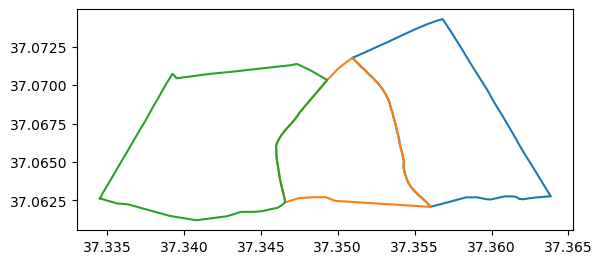

In [2]:
from functions import import_areas

addresses = ['Sarıgüllük Mahallesi', 'Gazi Mah., Gaziantep', 'Pancarlı Mahallesi']
areas, areas_gdf = import_areas(addresses)

ig, ax = plt.subplots()
ax.set_aspect('equal')

for a in areas:
    # Extract the exterior boundary of the area geometry
    polygon = a.geometry.exterior

    # Plot the exterior boundary using Matplotlib
    x, y = polygon.xy
    ax.plot(x, y)  # You can set a specific color

plt.show()

In [3]:
from trial_1 import Earthquake
from functions import import_buildings

# input earthquake data: accg, pga, sa03, sa06, sa10, time
Turkey_Feb2023_Quake= Earthquake(9.8, 0.49, 0.98, 0.98, 1.2, 400)

for a in areas:
    buildings = import_buildings(a, Turkey_Feb2023_Quake)

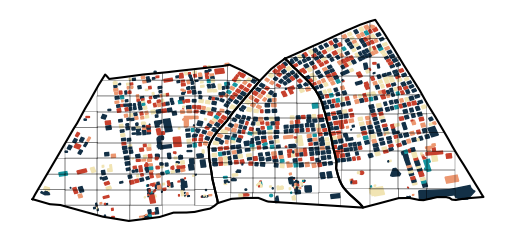

In [4]:
from functions import generate_sub_areas
from functions import show_geometry

# create the sub_areas for each area
for a in areas:
    generate_sub_areas(a, a.buildings, 7, 10)
    for s in a.sub_areas:
        for b in s.buildings:
            b.calculate_priority_weight(b)
        s._update_priority_weight()
    a._update_priority_weight()

# show the geometry for each area, sub_area and building
show_geometry(areas)

In [5]:
from functions import allocate_teams_to_areas

# allocate teams to areas based of input of number of teams (heavy, med, light) per sector
allocate_teams_to_areas(areas, 0, 0, 4, 0, 0, 0, 10)
print([[o.heavy_teams, o.med_teams, o.light_teams, o.task_force_teams, o.fire_fighter_teams, o.police_teams, o.volunteer_teams] for o in areas])

[[0, 0, 2, 0, 0, 0, 3], [0, 0, 1, 0, 0, 0, 4], [0, 0, 1, 0, 0, 0, 3]]


In [6]:
from functions import set_teams
from functions import get_sub_teams

area = areas[0]
sub_areas = area.sub_areas

# create the teams and sub_teams objects
teams = set_teams(area.heavy_teams, area.med_teams, area.light_teams, area.task_force_teams, area.fire_fighter_teams, area.police_teams, area.volunteer_teams)

# retrieve the sub_teams from the teams object
sub_teams = get_sub_teams(teams)
sub_teams_phase1 = [o for o in sub_teams if o.team_type != 'heavy' and o.team_type != 'medium' and o.team_type != 'light']
sub_team_members = [o.team_members for o in sub_teams]
print([o.team_type for o in sub_teams])
print([o.team_type for o in sub_teams_phase1])

['light', 'light', 'volunteer', 'volunteer', 'volunteer']
['volunteer', 'volunteer', 'volunteer']


In [7]:
sub_team = teams[0].sub_teams[0]

# Print the overall competence of a sub_team
print(f"The phase1 overall competence weight of sub_team {sub_team.sub_team_id} is:", round(sub_team.phase1_competence, 2))
print("-" * 30)

# Print the total action counts of all team members combined
if sub_team.action_counts:
    for action, count in sub_team.action_counts.items():
        print(f"{action}: {count}")

The phase1 overall competence weight of sub_team 0 is: 18.0
------------------------------
Command and Coordination: 1
Multiple Collapse Points: 1
Advanced Shoring and Heavy Machinery: 1
Urban Search and Rescue (USAR) Techniques: 1
Size-up and Scene Safety: 6
Casualty Assessment and Basic Medical Care: 6
Shoring and Stabilization (Basic): 6
Safe Access and Egress: 6
Advanced Scene Assessment: 4
Advanced Medical Care and Triage: 4
Advanced Shoring Techniques: 4
Complex Casualty Extrication: 4
Advanced Hazard Recognition: 2
Advanced Shoring and Trench Box Systems: 1
Casualty Packaging and Extrication: 1
Equipment Operation: 1
Scene Assessment and Safety: 1
Hazard Recognition: 1
Casualty Assessment and Basic Care: 1
Trench Shoring and Stabilization (Basic): 1
Advanced Knot Tying: 1
Complex Rope Systems: 1
Difficult Access: 1
Confined Space Rope Rescue: 1
Knot Tying: 3
Anchor Systems: 3
Ascending and Descending: 3
Rigging and Mechanical Advantage: 3
Advanced Confined Space Entry: 2
Special

In [8]:
from functions import print_phase1_competence

# prints a list of the phase1_competence of each sub_team
print_phase1_competence(teams)

   Team_ID Team_Class  Sub_Team_ID  Phase1_Competence
0        0      light            0               18.0
1        1      light            1               19.4
2        2  volunteer            2               12.2
3        3  volunteer            3               12.2
4        4  volunteer            4               12.2


In [9]:
from functions import allocate_sub_team_phase1

# allocate all teams during start
rem_sub_areas = allocate_sub_team_phase1(sub_areas, sub_teams_phase1)

# sort the sub_teams by remaining time
sorted_sub_teams = sorted(sub_teams_phase1, key=lambda x: (x.rem_time), reverse=True)

# allocate teams while there are sub_areas left and while there are teams with remaining time
while (len(rem_sub_areas) > 0) and any(o.rem_time > 0 for o in sorted_sub_teams):
    rem_sub_areas = allocate_sub_team_phase1(rem_sub_areas, sorted_sub_teams[0])
    sorted_sub_teams = sorted(sorted_sub_teams, key=lambda x: (x.rem_time), reverse=True)

------------------------------
sub_team 2 assigned to sub_area <trial_1.Sub_Area object at 0x0000015DFD4F5190>
amount of cleared buildings in area: 5
------------------------------
sub_team 3 assigned to sub_area <trial_1.Sub_Area object at 0x0000015DFD8FC790>
amount of cleared buildings in area: 8
------------------------------
sub_team 4 assigned to sub_area <trial_1.Sub_Area object at 0x0000015DFD8FC070>
amount of cleared buildings in area: 12
------------------------------
sub_team 3 assigned to sub_area <trial_1.Sub_Area object at 0x0000015DFD4F55B0>
amount of cleared buildings in area: 16
------------------------------
sub_team 4 assigned to sub_area <trial_1.Sub_Area object at 0x0000015DFD44A790>
amount of cleared buildings in area: 20
------------------------------
sub_team 2 assigned to sub_area <trial_1.Sub_Area object at 0x0000015DFD8FCAC0>
amount of cleared buildings in area: 24
------------------------------
sub_team 3 assigned to sub_area <trial_1.Sub_Area object at 0x000

In [10]:
from functions import allocate_sub_team_phase2

# allocate each sub_team to a sub_area based on actions
allocate_sub_team_phase2(sub_areas, sub_teams)

amount of combinations: 36 
amount of combinations after filtering: 36
Best combination score: 0.11731554553360857
Sub-area: <trial_1.Sub_Area object at 0x0000015DFD44A490>, Priority: 0.058657772766804284
Sub-area: <trial_1.Sub_Area object at 0x0000015DFD44A490>, Priority: 0.058657772766804284
Sub-area: None, Priority: 0
Sub-area: None, Priority: 0
Sub-area: None, Priority: 0


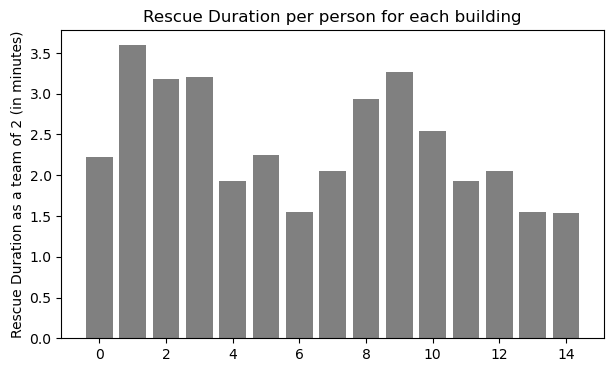

In [11]:
from functions import convert_to_dict
from functions import show_person_rescue_duration
 
# choose a sub_area and sub_team to generate a building clearing sequence for
sub_area = sub_areas[23]
sub_team = sub_teams[0]

# converts to a dictionary for easier access
buildings = convert_to_dict(sub_area, sub_team)

# calculate the person rescue duration for each building
Rescue_duration = show_person_rescue_duration(sub_team, buildings)

In [12]:
from functions import generate_building_sequences
from functions import analyse_sequences

# create number of sequences that you want to iterate over
num_simulations = 5000
sequences = generate_building_sequences(buildings, num_simulations)

# calculates the total rescue time for a given sequence of buildings
top_5_sequences = analyse_sequences(sequences, Rescue_duration)

Top 1 Sequence Score: 223.5
Total Rescued: 106
Total Rescue Time: 452
  Building ID: 2
  Initial People Count: [33, 16, 4, 8]
  Rescue distribution: [19, 12, 3, 7]
  Total Rescued: 41
  Total Rescue Time (in minutes): 150
--------------------
  Building ID: 1
  Initial People Count: [43, 21, 5, 11]
  Rescue distribution: [25, 15, 4, 10]
  Total Rescued: 54
  Total Rescue Time (in minutes): 214
--------------------
  Building ID: 3
  Initial People Count: [10, 5, 1, 2]
  Rescue distribution: [5, 3, 0, 1]
  Total Rescued: 9
  Total Rescue Time (in minutes): 48
--------------------
  Building ID: 11
  Initial People Count: [2, 1, 0, 0]
  Rescue distribution: [1, 0, 0, 0]
  Total Rescued: 1
  Total Rescue Time (in minutes): 21
--------------------
  Building ID: 0
  Initial People Count: [4, 2, 0, 1]
  Rescue distribution: [2, 1, 0, 0]
  Total Rescued: 3
  Total Rescue Time (in minutes): 26
--------------------
  Building ID: 4
  Initial People Count: [1, 1, 0, 0]
  Rescue distribution: [0

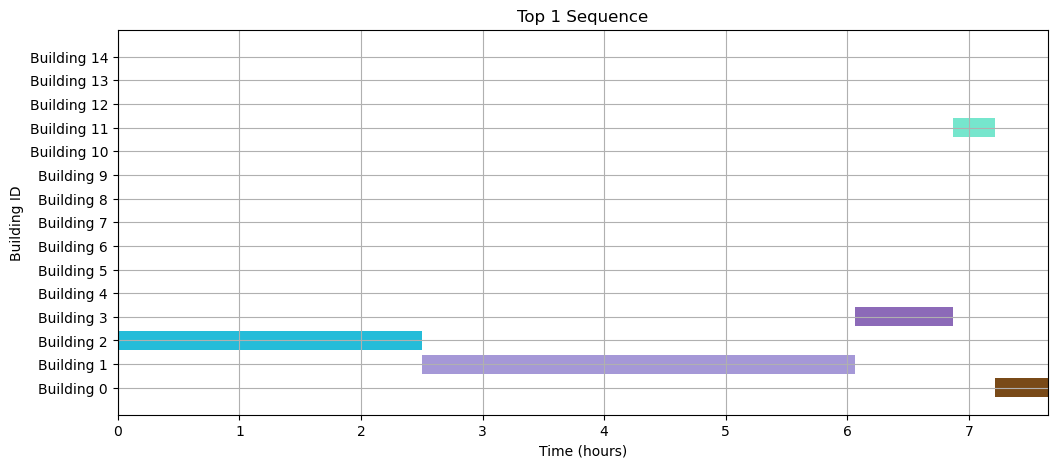

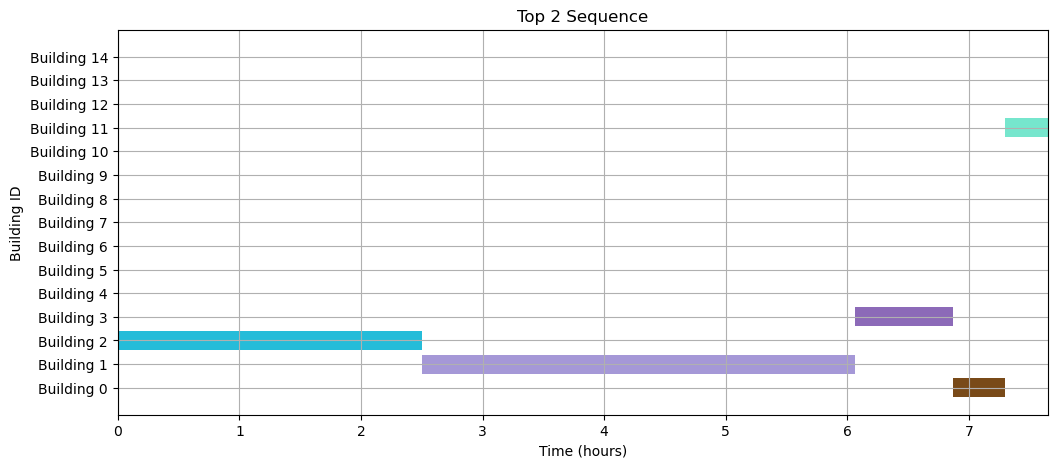

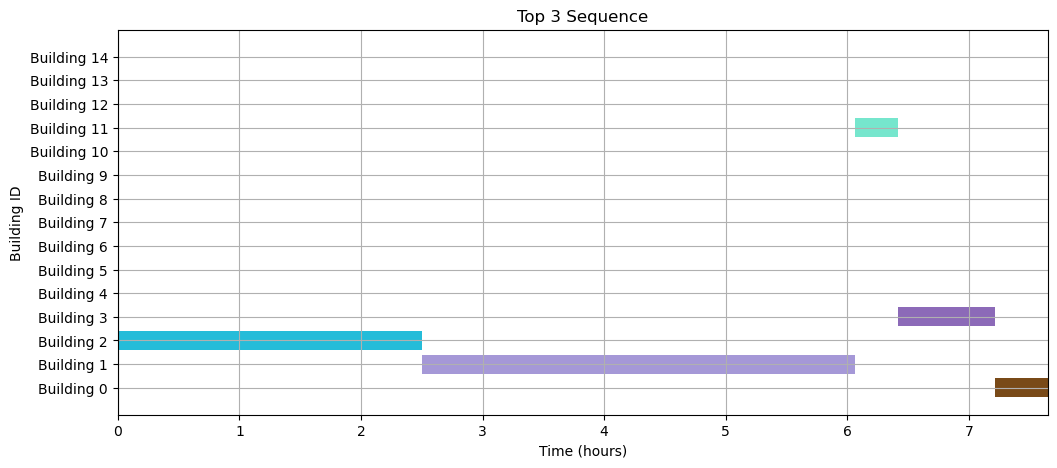

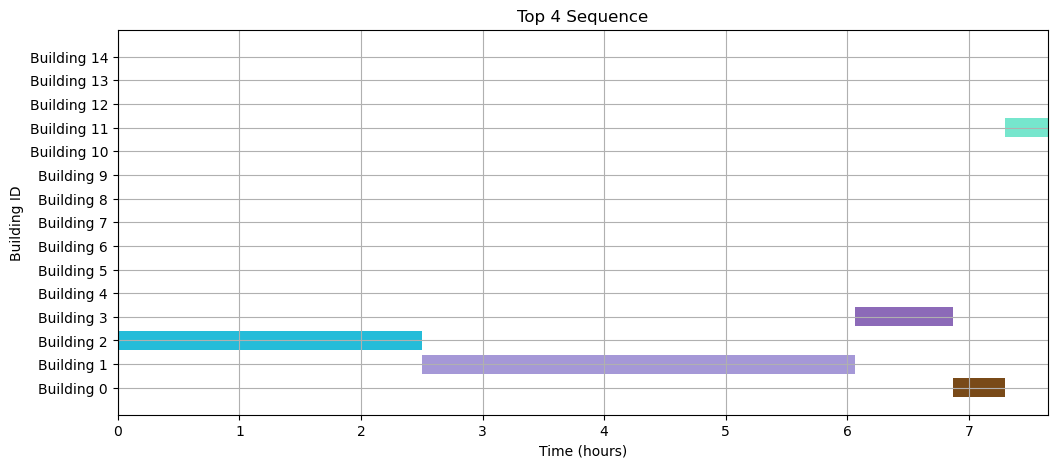

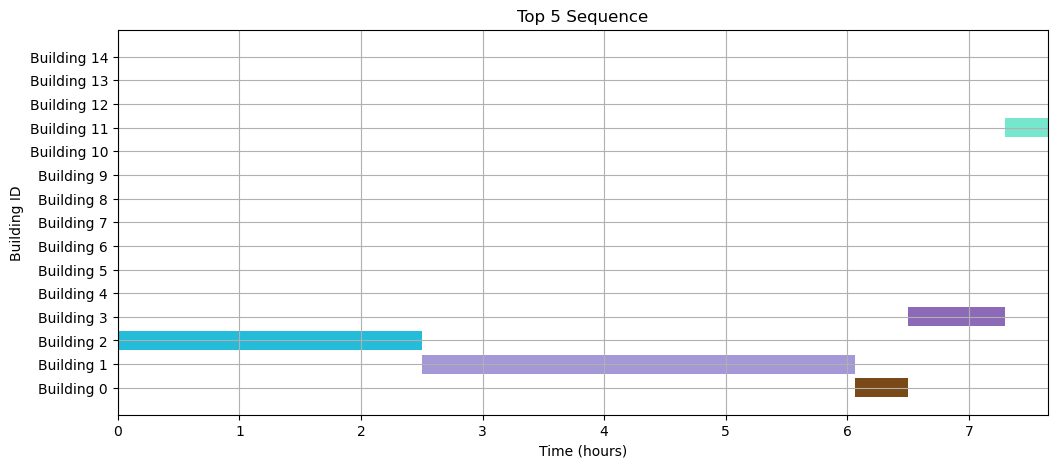

In [13]:
from functions import show_schedule

# show the schedule of the top 5 sequences
show_schedule(top_5_sequences)

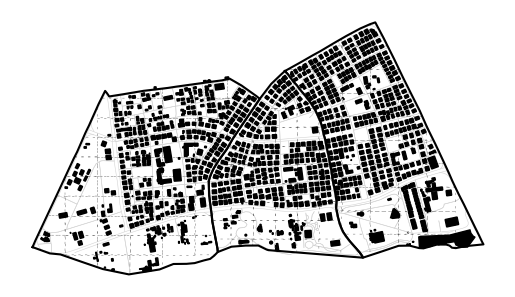

In [14]:
from functions import show_all_geometry

# show the geometry for each area, sub_area and building
show_all_geometry(areas)

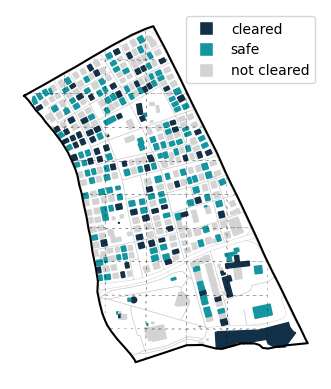

In [15]:
from functions import show_cleared_buildings

# show the geometry for each area, sub_area and building
show_cleared_buildings([area])

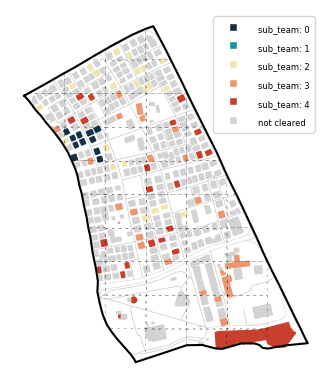

In [16]:
from functions import show_cleared_by

# show the geometry for each area, sub_area and building
show_cleared_by([area], sub_teams)

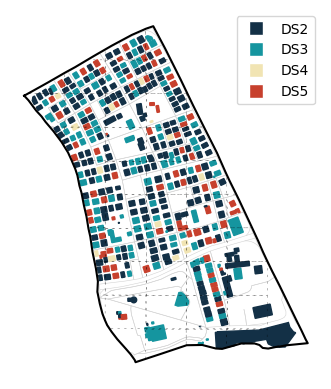

In [17]:
from functions import show_damage_states_buildings

# show the geometry for each area, sub_area and building
show_damage_states_buildings([area])

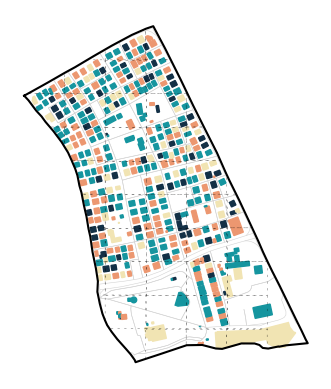

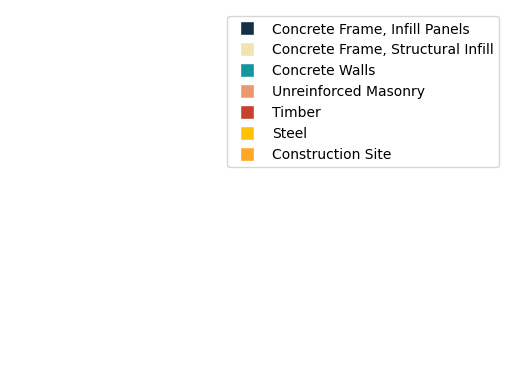

In [18]:
from functions import show_structural_system_buildings

# show the geometry for each area, sub_area and building
show_structural_system_buildings([area])

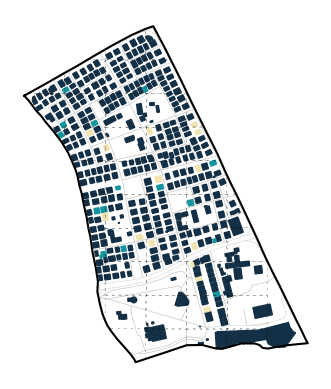

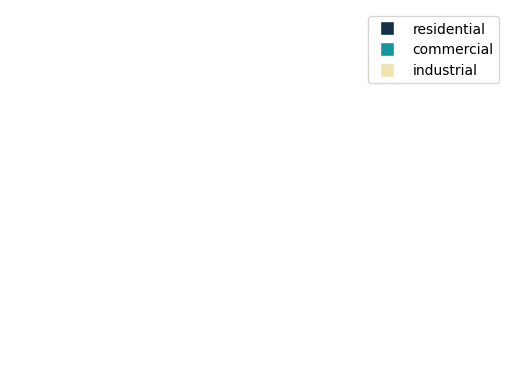

In [19]:
from functions import show_occupancy_type_buildings

# show the geometry for each area, sub_area and building
show_occupancy_type_buildings([area])

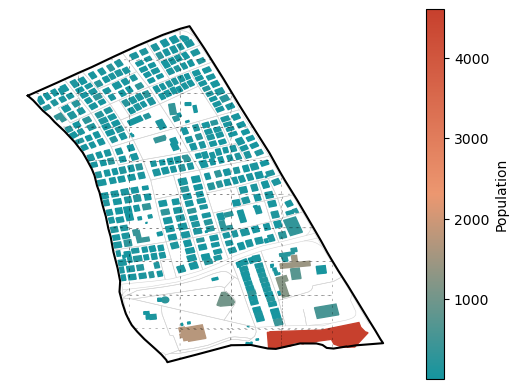

In [21]:
from functions import show_population_night_buildings

# Call the function with the list of areas
show_population_night_buildings([area])

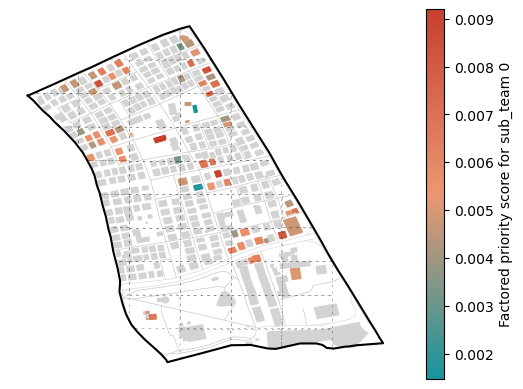

In [22]:
from functions import show_priority_score_buildings

# show the geometry for each area, sub_area and building
show_priority_score_buildings([area], sub_teams[0])